# UD120 - Classifing Enron POIs

## Introduction

Text....

## Data Exploration

Text....

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import pickle
from ggplot import *
from feature_format import featureFormat, targetFeatureSplit

In [25]:
## initiate seaborn plotting
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.color_palette()

In [108]:
## import dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    my_dataset = pickle.load(data_file)

In [109]:
my_dataset.pop('TOTAL');

In [110]:
df = pd.DataFrame.from_dict(my_dataset,orient='index')

In [111]:
df.head()

,from_poi_to_this_person,email_address,bonus,director_fees,from_this_person_to_poi,total_stock_value,loan_advances,shared_receipt_with_poi,other,restricted_stock,...,deferred_income,expenses,to_messages,total_payments,long_term_incentive,deferral_payments,poi,restricted_stock_deferred,salary,exercised_stock_options
ALLEN PHILLIP K,47,phillip.allen@enron.com,4175000,NaN,65,1729541,NaN,1407,152,126027,...,-3081055,13868,2902,4484442,304805,2869717,False,-126027,201955,1729541
BADUM JAMES P,NaN,NaN,NaN,NaN,NaN,257817,NaN,NaN,NaN,NaN,...,NaN,3486,NaN,182466,NaN,178980,False,NaN,NaN,257817
BANNANTINE JAMES M,39,james.bannantine@enron.com,NaN,NaN,0,5243487,NaN,465,864523,1757552,...,-5104,56301,566,916197,NaN,NaN,False,-560222,477,4046157
BAXTER JOHN C,NaN,NaN,1200000,NaN,NaN,10623258,NaN,NaN,2660303,3942714,...,-1386055,11200,NaN,5634343,1586055,1295738,False,NaN,267102,6680544
BAY FRANKLIN R,NaN,frank.bay@enron.com,400000,NaN,NaN,63014,NaN,NaN,69,145796,...,-201641,129142,NaN,827696,NaN,260455,False,-82782,239671,NaN


In [44]:
df.describe(include = 'all')

,from_poi_to_this_person,email_address,bonus,director_fees,from_this_person_to_poi,total_stock_value,loan_advances,shared_receipt_with_poi,other,restricted_stock,...,deferred_income,expenses,to_messages,total_payments,long_term_incentive,deferral_payments,poi,restricted_stock_deferred,salary,exercised_stock_options
count,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
unique,58,112,42,18,42,125,5,84,93,98,...,45,95,87,126,53,40,NaN,19,95,102
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,60,35,64,129,60,20,142,60,53,36,...,97,51,60,21,80,107,NaN,128,51,44
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.123288,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.329899,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


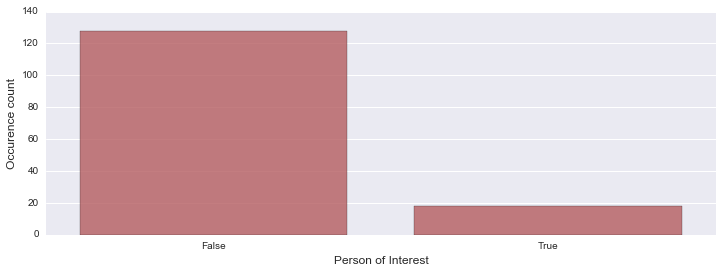

In [45]:
poi = df.poi.value_counts()

plt.figure(figsize=(12,4));
sns.barplot(poi.index, poi.values, alpha=0.8, color=p[2]);
plt.xlabel('Person of Interest', fontsize=12);
plt.ylabel('Occurence count', fontsize=12);

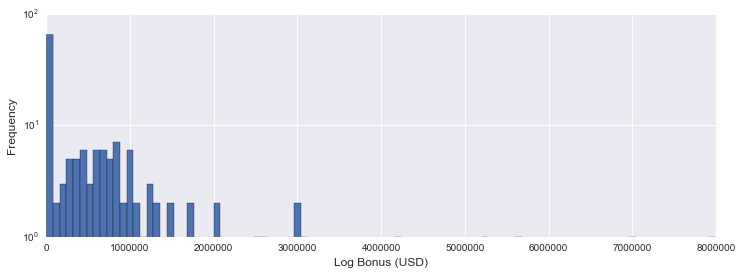

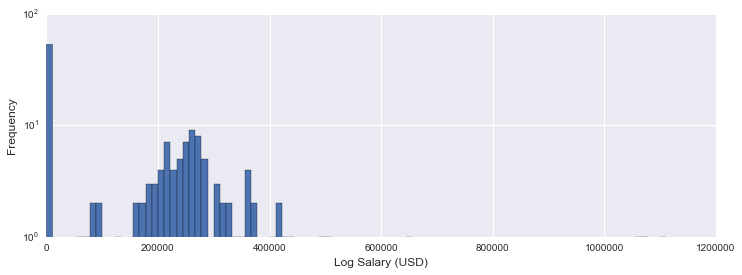

In [116]:
df['bonus'] = df['bonus'].replace('NaN',0)
df['salary'] = df['salary'].replace('NaN',0)

plt.figure(figsize=(12, 4))
plt.hist(df.bonus, bins=100, log=True)
plt.xlabel('Log Bonus (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


plt.figure(figsize=(12, 4))
plt.hist(df.salary, bins=100, log=True)
plt.xlabel('Log Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

In [36]:
my_dataset['WHALLEY LAWRENCE G'].keys()

dict_keys(['from_poi_to_this_person', 'email_address', 'bonus', 'director_fees', 'from_this_person_to_poi', 'total_stock_value', 'loan_advances', 'shared_receipt_with_poi', 'other', 'restricted_stock', 'from_messages', 'deferred_income', 'expenses', 'to_messages', 'total_payments', 'long_term_incentive', 'deferral_payments', 'poi', 'restricted_stock_deferred', 'salary', 'exercised_stock_options'])

# Modelling

In [74]:
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import tester

In [79]:
features_list = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 
                'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 
                'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi',
                'poi', 'shared_receipt_with_poi'] 

In [80]:
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [121]:
labels

[201955.0,
 0.0,
 477.0,
 267102.0,
 239671.0,
 80818.0,
 231330.0,
 213999.0,
 0.0,
 216582.0,
 187922.0,
 0.0,
 213625.0,
 248546.0,
 0.0,
 278601.0,
 0.0,
 248017.0,
 261516.0,
 330546.0,
 240189.0,
 261809.0,
 415189.0,
 0.0,
 0.0,
 0.0,
 288542.0,
 0.0,
 314288.0,
 184899.0,
 206121.0,
 365163.0,
 492375.0,
 210500.0,
 250100.0,
 262788.0,
 221003.0,
 278601.0,
 0.0,
 210692.0,
 182245.0,
 170941.0,
 304588.0,
 440698.0,
 199157.0,
 0.0,
 0.0,
 1060932.0,
 0.0,
 192008.0,
 231946.0,
 0.0,
 0.0,
 0.0,
 274975.0,
 272880.0,
 0.0,
 6615.0,
 374125.0,
 243293.0,
 0.0,
 0.0,
 0.0,
 262663.0,
 211788.0,
 0.0,
 0.0,
 0.0,
 130724.0,
 85274.0,
 288558.0,
 0.0,
 275101.0,
 404338.0,
 174246.0,
 271442.0,
 309946.0,
 224305.0,
 339288.0,
 1072321.0,
 273746.0,
 0.0,
 0.0,
 236457.0,
 0.0,
 349487.0,
 0.0,
 263413.0,
 365038.0,
 0.0,
 370448.0,
 0.0,
 365788.0,
 0.0,
 0.0,
 0.0,
 267093.0,
 251654.0,
 229284.0,
 0.0,
 329078.0,
 94941.0,
 261879.0,
 0.0,
 655037.0,
 197091.0,
 0.0,
 0.0,
 0.

In [118]:
### SVM Model
pca_svm = Pipeline([('pca',PCA(n_components=2)),('scaler',StandardScaler()),('svm',svm.SVC())])
param_grid = ([{'svm__C': [1000,10000],
                'svm__gamma': [0.01,0.0001],
                'svm__degree':[2,3],
                'svm__kernel': ['linear','rbf','poly']}])

svm_clf = GridSearchCV(pca_svm,param_grid,scoring='recall').fit(features,labels).best_estimator_


# ### KNB Model
# pca_knb = Pipeline([('pca',PCA(n_components=2)),('scaler',StandardScaler()),('knb',KNeighborsClassifier())])
# param_grid = ([{'knb__n_neighbors': [4,5,6]}])
# knb_clf = GridSearchCV(pca_knb,param_grid,scoring='recall').fit(features,labels).best_estimator_


# ### RFST Model
# pca_rfst = Pipeline([('pca',PCA(n_components=2)),('scaler',StandardScaler()),
#                  ('rfst',RandomForestClassifier())])
# param_grid = ([{'rfst__n_estimators': [4,5,6]}])
# rfst_clf = GridSearchCV(pca_rfst,param_grid,scoring='recall').fit(features,labels).best_estimator_

/Users/whitesi/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)
/Users/whitesi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/whitesi/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, re

ValueError: pos_label=1 is not a valid label: array([      0.,  278601.,  420636.])

In [ ]:
print (svm_clf)
tester.test_classifier(svm_clf,my_dataset,features_list)

print (knb_clf)
tester.test_classifier(knb_clf,my_dataset,features_list)

print (rfst_clf)
tester.test_classifier(rfst_clf,my_dataset,features_list)